## Imports

In [1]:
%pylab inline 
import cv2
from IPython.display import clear_output
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Tracked color in HSV format
lower_red = (170, 100, 100)
upper_red = (180, 255, 255)

In [11]:
# Define the starting frame here
skip_to_frame = 1100
end_at_frame = 8000
display_video = False


In [21]:
# Analyzed file
video = cv2.VideoCapture('/home/kiview/Videos/GOPR0523.mp4')
length = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
fps = video.get(cv2.CAP_PROP_FPS)
print(fps)
length

59.94005994005994


10636

In [22]:
frame_number = 0

object_movement = []

while video.isOpened():
    frame_number += 1
    
    if frame_number % 100 == 0:
        print("Frame: " + str(frame_number))
        progress = int(frame_number / end_at_frame * 100)
        
        progress_tenth = int(progress / 10)
        progress_bar = "[" + "#" * progress_tenth + " " * (10 - progress_tenth) + "] " + str(progress) + "%"
        print(progress_bar)
        clear_output(wait=True)

    if frame_number < skip_to_frame:
        video.grab()
        continue
        
    if frame_number > end_at_frame:
        break

    ret, image = video.read()

    if ret:
        hsv_frame = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        color_tracking_mask = cv2.inRange(hsv_frame, lower_red, upper_red)

        _, contours, _ = cv2.findContours(color_tracking_mask, cv2.RETR_EXTERNAL,
                                          cv2.CHAIN_APPROX_SIMPLE)

        # find biggest contour
        # biggest means max area
        if len(contours) > 0:
            tracked_object = max(contours, key=cv2.contourArea)
            x, y, w, h = cv2.boundingRect(tracked_object)
            object_movement.append((x, y))
            #print("x=" + str(x) + "; y=" + str(y))
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), thickness=3)
        
        if display_video:
            axis('off')
            title("Pigeons")
            imshow(image)
            show()
            clear_output(wait=True)


video.release()



Frame: 8000
[##########]100%


[(1180, 100), (1180, 104), (1176, 110), (1174, 112), (1172, 112), (1168, 112), (1164, 112), (1160, 112), (1156, 112), (1154, 112), (1148, 112), (1144, 112), (1140, 110), (1136, 110), (1131, 110), (1128, 108), (1122, 108), (1120, 106), (1116, 106), (1116, 104), (1110, 103), (1104, 102), (1098, 100), (1092, 100), (1076, 99), (1066, 98), (1050, 96), (1044, 96), (1038, 94), (1036, 92), (1030, 90), (1024, 88), (1022, 88), (1022, 86), (1014, 86), (1006, 86), (997, 86), (986, 86), (976, 86), (966, 86), (956, 84), (947, 84), (938, 84), (930, 80), (920, 80), (912, 81), (902, 80), (890, 80), (882, 80), (874, 78), (862, 80), (854, 80), (846, 86), (836, 88), (828, 90), (818, 91), (804, 86), (794, 82), (784, 84), (778, 86), (768, 88), (760, 92), (752, 92), (744, 92), (738, 90), (732, 88), (726, 86), (720, 88), (716, 88), (710, 90), (704, 90), (700, 92), (696, 96), (692, 96), (686, 98), (686, 96), (681, 94), (678, 94), (676, 94), (676, 96), (672, 96), (672, 96), (670, 98), (670, 96), (668, 96), (668

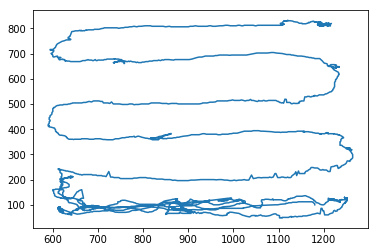

In [14]:
x = []; y=[]
for point in object_movement:
   x.append(point[0])
   y.append(point[1])
plt.plot(x,y)

print(object_movement)